In [32]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
%matplotlib inline

In [30]:
df = pd.read_csv('data/default_features_1059_tracks.txt', header=None)
x = df.as_matrix()

In [31]:
X = x[:,:69]
Y = x[:,69]

In [6]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
from sklearn.metrics import r2_score
r2_score(Y, clf.predict(X), multioutput='variance_weighted')

0.33768328835398942

In [12]:
for i in range(68):
    slop, intercept, rvalue, pvalue, std_err = sp.stats.linregress(X[:, i], Y)
    print("rvalue squared for feature %d : %f"%(i, rvalue**2))

rvalue squared for feature 0 : 0.000337
rvalue squared for feature 1 : 0.006108
rvalue squared for feature 2 : 0.004307
rvalue squared for feature 3 : 0.022222
rvalue squared for feature 4 : 0.070814
rvalue squared for feature 5 : 0.000009
rvalue squared for feature 6 : 0.010408
rvalue squared for feature 7 : 0.030213
rvalue squared for feature 8 : 0.031405
rvalue squared for feature 9 : 0.001152
rvalue squared for feature 10 : 0.006834
rvalue squared for feature 11 : 0.003290
rvalue squared for feature 12 : 0.002556
rvalue squared for feature 13 : 0.002104
rvalue squared for feature 14 : 0.001439
rvalue squared for feature 15 : 0.000308
rvalue squared for feature 16 : 0.000314
rvalue squared for feature 17 : 0.016678
rvalue squared for feature 18 : 0.011460
rvalue squared for feature 19 : 0.049709
rvalue squared for feature 20 : 0.002724
rvalue squared for feature 21 : 0.011075
rvalue squared for feature 22 : 0.017524
rvalue squared for feature 23 : 0.008807
rvalue squared for feature

In [26]:
for i in range(68):
    x, _ = sp.stats.boxcox(np.abs(X[:, i]))
    slop, intercept, rvalue, pvalue, std_err = sp.stats.linregress(x, Y)
    _, _, rvalue2, _, _ = sp.stats.linregress(X[:,i], Y)
#     print("rvalue squared for feature %d : %f"%(i, rvalue**2))
    print("improve %f %%", (rvalue2/rvalue)**2)

improve %f %% 3.27517435769
improve %f %% 13652.5610042
improve %f %% 76123.9212959
improve %f %% 1.68001380586
improve %f %% 790.834265389
improve %f %% 0.0028189206571
improve %f %% 1.0564177468
improve %f %% 16.2075204929
improve %f %% 2.06375906315
improve %f %% 0.310244267558
improve %f %% 0.763484657821
improve %f %% 1.45455098679
improve %f %% 1.398673433
improve %f %% 0.35058151174
improve %f %% 0.108824118156
improve %f %% 0.0655499645281
improve %f %% 0.0244528834224
improve %f %% 17.4432014835
improve %f %% 14.9173383734
improve %f %% 3.510499251
improve %f %% 0.117688706044
improve %f %% 10.9024468455
improve %f %% 2.68925303558
improve %f %% 53.4873520738
improve %f %% 4.34145084976
improve %f %% 25.5726924791
improve %f %% 3.43914939153
improve %f %% 4.9246530438
improve %f %% 2.80873911666
improve %f %% 0.147787071776
improve %f %% 0.0015342694063
improve %f %% 0.116055585978
improve %f %% 0.0327375513889
improve %f %% 0.0985409868531
improve %f %% 0.0886120754145
improv

In [16]:
np.min(X[:, i]-np.min(X[:,i])+1)

1.0

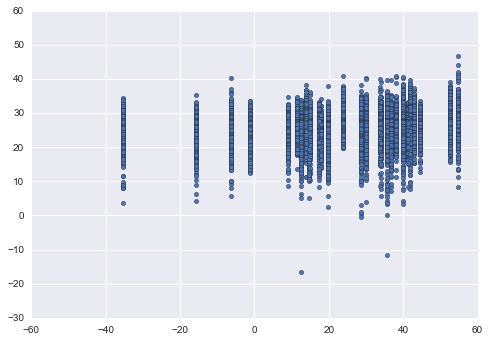

In [62]:
import seaborn as sns; sns.set(color_codes=True)
from matplotlib import pyplot
clf = linear_model.LinearRegression()
Y = X[:,68]
for i in range(68):
    slop, intercept, rvalue, pvalue, std_err = sp.stats.linregress(X[:,i], Y)
    pyplot.scatter(y=X[:,i]*slop+intercept, x=Y)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85
5,0.059217,0.034537,-0.703441,0.188652,-0.270353,1.420526,0.467766,0.209594,-0.496505,1.239908,...,0.501017,-0.354263,0.445184,0.060328,0.075293,-0.170387,-0.506187,-0.008470,12.65,-8.00
6,-0.280628,-0.310082,-0.756816,0.839033,-0.196670,1.153469,-0.473974,1.491603,-0.105328,1.365001,...,0.473937,-0.433843,0.813016,1.101685,-0.936123,-0.280096,-0.995073,-0.872726,12.65,-8.00
7,-0.503840,-0.633080,-0.142764,-0.065937,0.259608,0.338967,-0.196791,1.638602,0.933850,0.415837,...,-0.435378,-0.315558,0.329131,-0.136452,-0.123053,-0.392567,-0.636443,-0.426214,14.66,-17.41
8,0.358054,0.224749,-0.418566,0.010736,0.160657,-0.046321,-0.302215,0.534560,-0.561671,-0.335905,...,-0.899664,-1.127195,-1.116885,-1.043855,-0.922181,-0.870768,-0.834012,-0.929364,52.50,-0.12
9,-0.905772,-0.576675,-0.715466,-0.603780,0.247513,1.131966,-0.389026,0.129503,1.017126,1.191000,...,-0.425955,-0.304674,-1.111613,-0.937458,-0.584648,-1.092478,-0.971362,-0.999936,41.26,69.21
